Main Python code to perform the simulation and display results

In [1]:
import numpy as np
from matplotlib import pyplot as plt, colors as mcolors
from scipy.integrate import solve_ivp
from scipy.constants import G, au
from sklearn.preprocessing import MinMaxScaler

import barneshut

Initial parameters:

In [2]:
massfactor = 10**24 # [kg]
scalefactor = 1000  # [au]
velocityfactor = 100  # []
accuracy = 0.001

Generate random body system:

In [3]:
count = 50

In [4]:
def massGen():
    for _ in range(count):
        yield abs(np.random.randn())*massfactor

def positionGen():
    for _ in range(count):
        yield np.random.randn(2)*scalefactor*au

def velocityGen():
    for _ in range(count):
        yield np.random.randn(2)*velocityfactor

In [5]:
bodies = zip(masses := np.array([[_ for _ in massGen()]]), positions := np.array([_ for _ in positionGen()]))

In [6]:
masses

array([[1.26815543e+23, 7.47977233e+21, 8.36249864e+23, 4.22390169e+23,
        1.12236588e+24, 4.49251660e+22, 5.78226649e+23, 2.06112250e+24,
        3.33551997e+23, 1.90402068e+24, 1.48166808e+24, 1.00020989e+23,
        6.03374094e+23, 1.93141330e+23, 5.63736141e+23, 1.19295659e+24,
        1.45943049e+22, 4.98586533e+23, 1.08387555e+24, 1.26958220e+23,
        2.65189921e+23, 2.85324343e+23, 1.48318616e+24, 5.08460865e+23,
        6.48744341e+23, 5.14826847e+23, 3.86710573e+23, 1.26337061e+24,
        1.23775407e+24, 1.12373427e+23, 1.05572620e+22, 8.14473759e+23,
        1.75048436e+24, 8.67687493e+22, 5.28384722e+22, 4.48555955e+23,
        3.54667885e+23, 1.94629313e+23, 1.01445476e+24, 1.92152181e+24,
        5.83873375e+23, 2.60763942e+23, 6.17378120e+23, 1.47202133e+24,
        7.95651091e+23, 1.58536461e+23, 1.53930486e+23, 1.98527946e+24,
        7.44004638e+23, 5.02691562e+23]])

In [7]:
velocities = np.array([_ for _ in velocityGen()])

Show data:

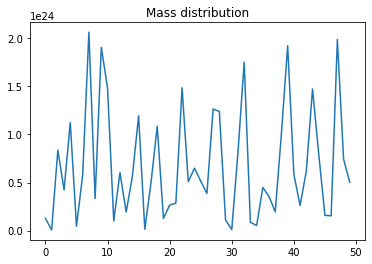

In [8]:
plt.title('Mass distribution')
plt.plot(masses.flatten())

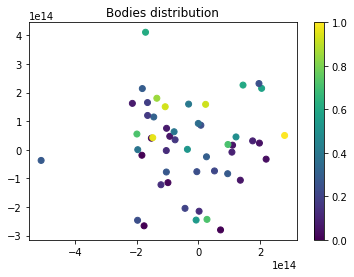

In [9]:
mass_scaler = MinMaxScaler()
cmap = mass_scaler.fit_transform(masses.reshape(-1, 1))
c = mcolors.ColorConverter().to_rgb

plt.title('Bodies distribution')
plt.scatter(positions[:, 0], positions[:, 1], c=cmap)
plt.colorbar()

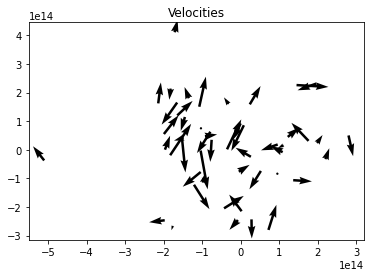

In [10]:
plt.title('Velocities')
plt.quiver(positions[:,0], positions[:,1], velocities[:,0], velocities[:,1])

Compute forces using C++ function:

In [11]:
state = np.concatenate((masses.T, positions), axis=1)

In [12]:
radius = max(abs(positions.flatten())) * 1.1  # Emergency reserve
radius

561192470188795.56

In [13]:
result = np.array(barneshut.getForces(state, count, radius, accuracy)) * G
result

array([[-4.57431879e+09,  3.81789183e+09],
       [-1.40967088e+08,  3.82368792e+36],
       [ 6.48957026e+09, -3.08049559e+10],
       [ 1.56924403e+10, -2.18514040e+09],
       [ 8.56460333e+10,  5.17581388e+10],
       [-9.63368464e+08,  1.75830879e+09],
       [-1.78868403e+10,  1.79171931e+10],
       [-4.63609151e+10,  3.86785503e+09],
       [-9.61326154e+09,  2.74254914e+10],
       [-6.79738824e+10, -6.20860991e+10],
       [-1.09622516e+11,  3.60338771e+10],
       [-4.49585460e+09,  1.81168073e+09],
       [ 3.33526470e+10, -3.83752994e+10],
       [-6.91362272e+09,  6.16819862e+08],
       [ 6.27934681e+09,  1.43217546e+10],
       [-9.41415413e+10,  8.94330267e+10],
       [-5.55200364e+08,  1.45570211e+37],
       [ 3.73832019e+09,  1.84924500e+10],
       [-1.03991036e+10,  3.11703850e+10],
       [ 4.40643454e+39,  1.01946502e+10],
       [ 2.44016727e+09, -4.80639775e+39],
       [ 7.14963503e+09,  1.09939954e+10],
       [ 1.27610500e+11, -1.33883217e+10],
       [ 1.

Computation starting.. 
Conversion.. 
Tree construction..
Force computation.. 
Conversion.. 
Done!
Node {
Count: 50, Center: (0.000000, 0.000000), Radius: 561192470188795.562500
Pseudobody: mass: 33925084007894372860297216.000000, position: (-24418334689146.378906, 56998636857231.859375)
Bodies: 
[126815543102104540282880.000000, 136316699274988.531250, -106270563750901.515625]
[7479772333730299904000.000000, -176076836326980.187500, -265754063338150.812500]
[836249863763417083412480.000000, -31557430365172.195312, 159804723503518.718750]
[422390169388269118160896.000000, -43201350988741.679688, -204651342090677.062500]
[1122365880052784255991808.000000, -7205544013162.920898, -245636130990844.968750]
[44925165971779639836672.000000, -98639935076176.718750, -114806946532210.468750]
[578226649258065412489216.000000, 95182912243909.109375, -83549764075827.500000]
[2061122502756175951429632.000000, 279983465583069.125000, 50168099437919.804688]
[333551996807639967203328.000000, -754315200

In [14]:
masses

0114913.234375]
[285324342822952545288192.000000, -121245099219566.375000, -122139696637950.609375]
[260763941653623135535104.000000, -104021357308095.703125, -2628826986161.090820]
}
Node {
* Leaf node *
Count: 1, Center: (-35074529386799.722656, -105223588160399.171875), Radius: 35074529386799.722656
Pseudobody: mass: 498586533186812027863040.000000, position: (-4869683563918.528320, -76463430114913.234375)
Bodies: 
[498586533186812027863040.000000, -4869683563918.528320, -76463430114913.234375]
}
Node {
Count: 3, Center: (-105223588160399.171875, -105223588160399.171875), Radius: 35074529386799.722656
Pseudobody: mass: 893985650167629823868928.000000, position: (-109107689004609.578125, -93706615072323.546875)
Bodies: 
[44925165971779639836672.000000, -98639935076176.718750, -114806946532210.468750]
[563736141372897605189632.000000, -103798763798430.796875, -77634226697554.468750]
[285324342822952545288192.000000, -121245099219566.375000, -122139696637950.609375]
}
Node {
* Leaf nod

array([[1.26815543e+23, 7.47977233e+21, 8.36249864e+23, 4.22390169e+23,
        1.12236588e+24, 4.49251660e+22, 5.78226649e+23, 2.06112250e+24,
        3.33551997e+23, 1.90402068e+24, 1.48166808e+24, 1.00020989e+23,
        6.03374094e+23, 1.93141330e+23, 5.63736141e+23, 1.19295659e+24,
        1.45943049e+22, 4.98586533e+23, 1.08387555e+24, 1.26958220e+23,
        2.65189921e+23, 2.85324343e+23, 1.48318616e+24, 5.08460865e+23,
        6.48744341e+23, 5.14826847e+23, 3.86710573e+23, 1.26337061e+24,
        1.23775407e+24, 1.12373427e+23, 1.05572620e+22, 8.14473759e+23,
        1.75048436e+24, 8.67687493e+22, 5.28384722e+22, 4.48555955e+23,
        3.54667885e+23, 1.94629313e+23, 1.01445476e+24, 1.92152181e+24,
        5.83873375e+23, 2.60763942e+23, 6.17378120e+23, 1.47202133e+24,
        7.95651091e+23, 1.58536461e+23, 1.53930486e+23, 1.98527946e+24,
        7.44004638e+23, 5.02691562e+23]])

6.187500, 18621672732400.035156]
}
Node {
* Leaf node *
Count: 1, Center: (122760852853799.031250, 52611794080199.585938), Radius: 17537264693399.861328
Pseudobody: mass: 1014454764848970322673664.000000, position: (122229044746515.421875, 45024649050629.125000)
Bodies: 
[1014454764848970322673664.000000, 122229044746515.421875, 45024649050629.117188]
}
Node {
* Leaf node *
Count: 1, Center: (35074529386799.722656, 105223588160399.171875), Radius: 35074529386799.722656
Pseudobody: mass: 508460865398118706839552.000000, position: (8216191966011.129883, 85858376827387.593750)
Bodies: 
[508460865398118706839552.000000, 8216191966011.128906, 85858376827387.593750]
}
Node {
Count: 3, Center: (210447176320798.343750, 210447176320798.343750), Radius: 70149058773599.445312
Pseudobody: mass: 2945537504307303464042496.000000, position: (178499874698264.156250, 222616392125835.218750)
Bodies: 
[1192956586579940025040896.000000, 205375649110063.343750, 214858419164954.656250]
[51482684735750451023

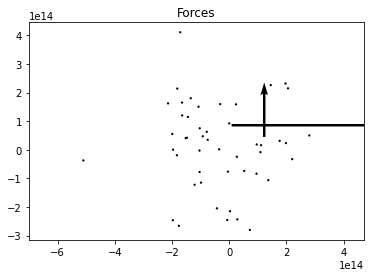

In [15]:
fig, ax = plt.subplots()
ax.quiver(positions[:,0], positions[:,1], result[:,0], result[:,1])
ax.set_title('Forces')
ax.axis('equal')

plt.show()